# Exercices for the Montreal Metro Incidents Dataset

## Instructions

- Complete as needed this notebook in order to be able to answer the various questions.
- Submit on moodle your notebook as well as the PDF copy of your notebook (with answers computed)
- Please submit a clean notebook (i.e. only the code needed to obtain the answers and not including all debugging / trials you did)

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

## Data

In [2]:
df = pd.read_csv("Metro.csv")

### Data cleaning

In [3]:
# Insert below operations that are required to clean the dataset
# Remove columns that will not be used
df = df.drop('Porte', axis=1)
df = df.drop('Urgence métro', axis=1)
df = df.drop('Numéro de tournée', axis=1)
df = df.drop("Numero d'incident", axis=1)
df = df.drop("Incident en minutes", axis=1)
df = df.drop("Évacuation", axis=1)
df = df.drop("Année civile/mois", axis=1)
df = df.drop("Jour calendaire", axis=1)
df = df.drop("Véhicule", axis=1)
df = df.drop("Porte de voiture", axis=1)
df = df.drop(df[df["Code de lieu"]=='1999'].index)
df = df.drop(df[df["Code de lieu"]=='2999'].index)
df = df.drop(df[df["Code de lieu"]=='4999'].index)
df = df.drop(df[df["Code de lieu"]=='5999'].index)
df = df.drop(df[df["Code de lieu"]=='9999'].index)
df.drop(df[df.Ligne=='05-Jan'].index, inplace=True)
df.drop(df[df.Ligne=='2004-02-01'].index, inplace=True)
df.drop(df[df.Ligne=='2004-01-02'].index, inplace=True)
df.drop(df[df.Ligne=='2002-01-05'].index, inplace=True)

# Remove incidents which are of type metro station (to keep only incidents which affected the metro service)
df = df.drop(df[df["Type d'incident"] == 'S'].index)

In [4]:
# Now we can remove the column as it is no longer usefull
df = df.drop("Type d'incident", axis=1)
# Insert below operations that you want to perform to transform data 
t1 = pd.to_datetime(df["Heure de l'incident"], format='%H:%M', errors='coerce')
t2 = pd.to_datetime(df['Heure de reprise'], format='%H:%M', errors='coerce')
# A transformation that will be needed is to create a dataFrame which contains incidents labeled uniquely according a single line (refer to what we did in the lecture)
df["Heure de l'incident"] = t1.apply(lambda x: (x.hour + x.minute / 60 ))
df['Heure de reprise'] = t2.apply(lambda x: (x.hour + x.minute / 60 ))
df['duration'] = (df['Heure de reprise']-df["Heure de l'incident"]) * 60

## Questions

### 1. Which are the main primary and second causes for interruptions?

In this question we want to know what are the major primary and secondary causes for interruptions in the metro service.<br>
The primary causes can be found in the field `Cause primaire` and the secondary causes in the field `Cause secondaire`.

- Use the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method on the `Cause primaire`, respectively `Cause secondaire` to aggregate the data according the causes.
- Apply the [`count()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html) method to count them
- To find the cause responsible for most incidents the dataframe method [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html) can be used.
- Alternatively you can sort the values with the method [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
- To create a pie chart use the [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie) method form [`MatPlotLib`](https://matplotlib.org/stable/index.html)
- Percentage values can be added to the pie chart using the `autopct` option (for example `autopct='%1.0f%%'`)

Notes:
1. You may want to use Google translate to understand what is the actual highest primary/secondary cause in case you dont speak French.
2. The cryptic code `MR-73` refers to the old train constellation of the STM and the code `MPM10` is the new train constellation

In [5]:
# What is the most frequent primary cause for incidents?
df_PC = df.groupby('Cause primaire').count()['Ligne']
MaxPC = df_PC.idxmax()
MaxPC


'Clientèle'

In [6]:
# What is the most frequent secondary cause for incidents?
df_SC = df.groupby('Cause secondaire').count()['Ligne']
MaxSC = df_SC.idxmax()
MaxSC

'Méfait volontaire'

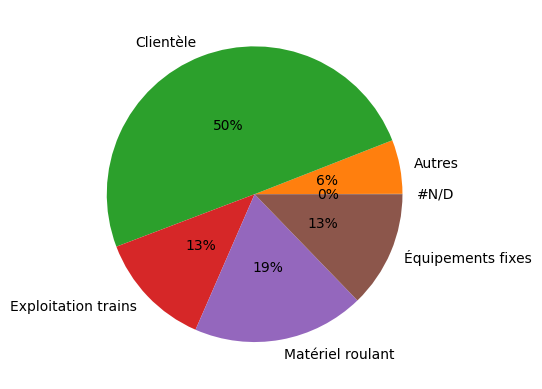

In [7]:
# Create a pie chart for the primary causes for the year 2019
df2019 = df[(df["Année civile"] == 2019)]
PC19 = df2019.groupby('Cause primaire').count()['Ligne']
plt.pie(PC19, labels=PC19.index, autopct='%1.0f%%', pctdistance=0.5)
plt.show()


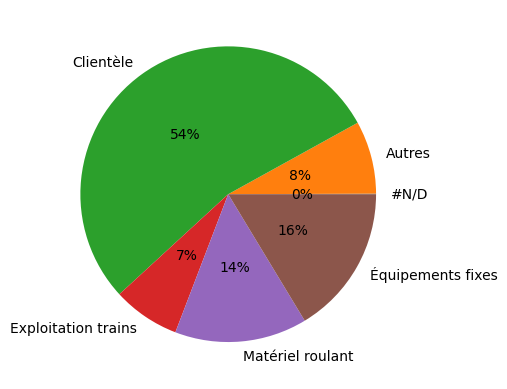

In [8]:
# Create a pie chart for the primary causes for the year 2021
df2021= df[(df["Année civile"] == 2021)]
PC21 = df2021.groupby('Cause primaire').count()['Ligne']
plt.pie(PC21, labels=PC21.index, autopct='%1.0f%%', pctdistance=0.5)
plt.show()

In [9]:
# Bonus question (optional)
# Create bar-plot charts which shows in decreasing order the primary, respectively secondary, causes for service interruptions

@interact(cause=widgets.Dropdown(options=['Cause primaire', 'Cause secondaire'],
                                description='Cause'))
def causes_for_interruptions(cause):
    """
    Number of incidents due to various causes
    """

interactive(children=(Dropdown(description='Cause', options=('Cause primaire', 'Cause secondaire'), value='Cau…

### 2. Which metro stations are the most often a source of incidents ?

The field `Code de lieu` contains the name of the metro station that was the source of the incident.<br>
You may find some "strange" metro station names (e.g. `B124`). For the purpose of this exercise we consider these entries as errors and they should ideally be removed during the cleaning phase. (You may wish to remove at least some of them to show the idea).

Conduct your analysis per metro line and year (i.e. report for each metro line and year, which metro station was the most often the source of an incident)

How does compare the metro station 'Guy-Concordia' to this ?

Possible method:
- Use the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to list for each metro line the number of incidents per metro stations
- For each of the lines, extract the station with the highest number of incidents The dataframe method [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html) can be used for this task.

Observe how the metro stations are reported. You will see that some contain more than one station (as more than one station where the source of the incident).
For example you will find "Atwater/Guy-Concordia" which shows that here two stations were involved.

For advanced programmers (optional): try to take this into account by creating two incidents : one for `Atwater` and one for `Guy-Concordia`.<br>
To automate this, you can search for entries containing the character `/` and then split the string into two strings (left and right from '/')<br>
You can however ignore this effect and do the exercise assuming that "Atwater/Guy-Concordia" is another "valid" metro station without loosing any mark.

In [10]:
df1 = df[(df.Ligne == 'Ligne orange') | (df.Ligne == 'Ligne verte') | (df.Ligne == 'Ligne bleue') | (df.Ligne == 'Ligne jaune')].copy()

In [11]:
# Yellow metro line
df_yellow = df[df.Ligne.str.contains("5")]
df_yellow = df_yellow.assign(Ligne='Ligne jaune')
df1 = pd.concat([df1, df_yellow])
Max_Station_yellow = df1[df1["Ligne"]=="Ligne jaune"].groupby('Code de lieu').count()['Ligne']
Max_Station_yellow = Max_Station_yellow.idxmax()

print("The station with Maximum number of incidents on the yellow line is")
Max_Station_yellow


The station with Maximum number of incidents on the yellow line is


'Berri-UQAM'

In [12]:
# Blue metro line
df_blue = df[df.Ligne.str.contains("4")]
df_blue = df_blue.assign(Ligne='Ligne bleue')
df1 = pd.concat([df1, df_blue])
Max_Station_blue = df1[df1["Ligne"]=="Ligne bleue"].groupby('Code de lieu').count()['Ligne']
Max_Station_blue = Max_Station_blue.idxmax()

print("The station with Maximum number of incidents on the blue line is")
Max_Station_blue

The station with Maximum number of incidents on the blue line is


'Snowdon'

In [13]:
# Orange metro line
df_orange = df[df.Ligne.str.contains("1")]
df_orange = df_orange.assign(Ligne='Ligne orange')
df1 = pd.concat([df1, df_orange])
Max_Station_orange = df1[df1["Ligne"]=="Ligne orange"].groupby('Code de lieu').count()['Ligne']
Max_Station_orange = Max_Station_orange.idxmax()

print("The station with Maximum number of incidents on the orange line is")
Max_Station_orange

The station with Maximum number of incidents on the orange line is


'Côte-Vertu'

In [14]:
# Green metro line
df_green = df[df.Ligne.str.contains("2")]
df_green = df_green.assign(Ligne='Ligne verte')
df1 = pd.concat([df1, df_green])
Max_Station_green = df1[df1["Ligne"]=="Ligne verte"].groupby('Code de lieu').count()['Ligne']
Max_Station_green= Max_Station_green.idxmax()

print("The station with Maximum number of incidents on the green line is")
Max_Station_green

The station with Maximum number of incidents on the green line is


'Berri-UQAM'

### 3. Events due to the use of emergency break by users

The field `KFS` reports if the interruption was due to the usage of an emergency break (`KFS == 1`).

Provide two graphs to analyze this situation:
- A first graph for the green line: report for a given year, the total number of incidents in each month due to the usage of the emergency break
- A second graph: extend the previous graph to report not only the green line, but all four lines (i.e. a graph for a given year which shows, for each month, the total number of incidents due to to emergency break usage for each metro line)

In [15]:
# Graph 1
# Graph with total number of of incidents due to emergency break usage per month for a given year on the green line
# The green line is 'Ligne verte'
# Use the following function template as start point
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def number_monthly_KFS_green_line_year(year):
    """
    Number of incidents due to emergency break usage on each month for a given year of the green line
    """
    # Creating a subset of main data frame using the year and emergency break useage as conditions
    incidentsKFS = df1[(df1["Année civile"] == year) & (df1["KFS"] == 1)]
    #aggregating the number of incidents in terms of each month of the year
    incK = incidentsKFS[(incidentsKFS["Ligne"]=="Ligne verte")].groupby('Mois calendrier').count()['duration']
    
    incK.plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel("Total number of incidents")
    plt.title("Number of incidents due to emergency break usage on the green line " +str(year))
    plt.xticks(rotation=0)
    plt.show()            

interactive(children=(Dropdown(description='Year', options=(2019, 2020, 2021, 2022), value=2019), Output()), _…

In [ ]:
# Graph 2
# Graph with total number of of incidents due to emergency break usage per month and metro line for a given year
# Each metro line should be represented by its color on the graph
# Use the following function template as start point
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def number_monthly_KFS_year(year):
    """
    Number of incidents due to emergency break usage on each month and metro line for a given year
    """
    # Creating a subset of main data frame using the year and emergency break useage as conditions
    df2 = df1[(df1["Année civile"] == year) & (df1["KFS"] == 1)].groupby(["Mois calendrier","Ligne"]).count()['duration']

                                                                                     
    plt.ylabel("Number of incidents")
    plt.title("Number of incidents per month due to emergency break " +str(year))
    plt.legend()
    plt.show()

In [ ]:
month= np.sort(df1["Mois calendrier"].unique())
    width =np.min(np.diff(month))/12 
    jaune = df2.loc[('Ligne jaune', slice(None)), :]['duration']
    bleue = df2.loc[('Ligne bleue', slice(None)), :]['duration']
    orange = df2.loc[('Ligne orange', slice(None)), :]['duration']
    verte = df2.loc[('Ligne verte', slice(None)), :]['duration']
    
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(1,2,1)
    ax.bar(month - 2*width, jaune, width, color='#FFD700', label='Ligne jaune', align='edge')
    ax.bar(month - 1*width, bleue, width, color='tab:blue', label='Ligne bleue', align='edge')
    ax.bar(month + 0*width, orange, width, color='tab:orange', label='Ligne orange', align='edge')
    ax.bar(month + 1*width, verte, width, color='tab:green', label='Ligne verte', align='edge')

### 4. How many incidents are due to vandalism ?

These events can be found in the field `'Cause secondaire'`.<br>
They are labeled as `'Méfait volontaire'`

Make your analysis based on 
- metro line
- years
- total and average number of incidents

First create the two requested graphs below and then add one more graph you feel that would make sense 

In [ ]:
# Graph with total number of of incidents due to vandalism per year and metro line
# Each metro line should be represented by its color on the graph
# Use the following function template as start point
@interact(year=widgets.Dropdown(options=df["Année civile"].unique(),
                                description='Year'))
def total_number_of_vandalism_incidents_year(year):
    """
    Total number of vandalism incidents for each metro line for a given year
    """
    incVand =df1[(df1["Année civile"] == year) & (df1["Cause secondaire"] == "Méfait volontaire")].groupby(["Ligne"])["Cause secondaire"]
    incVand.size().plot.bar(color=['blue','#FFD700', 'orange', 'green'])
    plt.ylabel("Total number of incidents")
    plt.title("Total number of incidents due to vandalism per metro line "+str(year))
    plt.xticks(rotation=0)
    plt.show()

In [16]:
# Graph with average number of of incidents per year due to vandalism and metro line
# Each metro line should be represented by its color on the graph
# Use the following function template as start point

def average_number_of_vandalism_incidents():
    """
    Average number of incidents per year due to vandalism
    """
    avg_inc = df1[(df1["Cause secondaire"] == "Méfait volontaire")].groupby(['Année civile','Ligne']).count()
    
    avg_inc.size().plot.bar(color=['blue','#FFD700', 'orange', 'green'])
    plt.ylabel("Total number of incidents")
    plt.title("Total number of incidents due to vandalism per metro line "+str(year))
    plt.xticks(rotation=0)
    plt.show()  

In [ ]:
# Your own graph of data representation that could be useful to understand vandalism events in Montreal metro
